In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

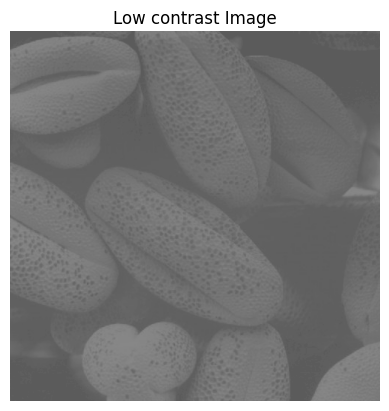

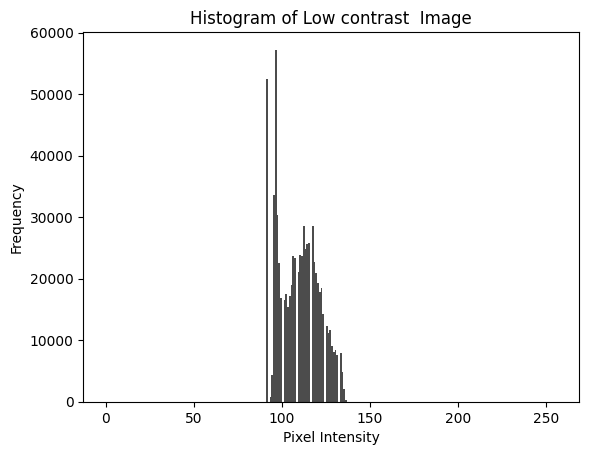

In [2]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Fig0320(2)(2nd_from_top).tif')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Low contrast Image')
plt.axis('off')
plt.show()

plt.hist(img.ravel(), bins=256, range=[0,256], color='black', alpha=0.7)
plt.title('Histogram of Low contrast  Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()



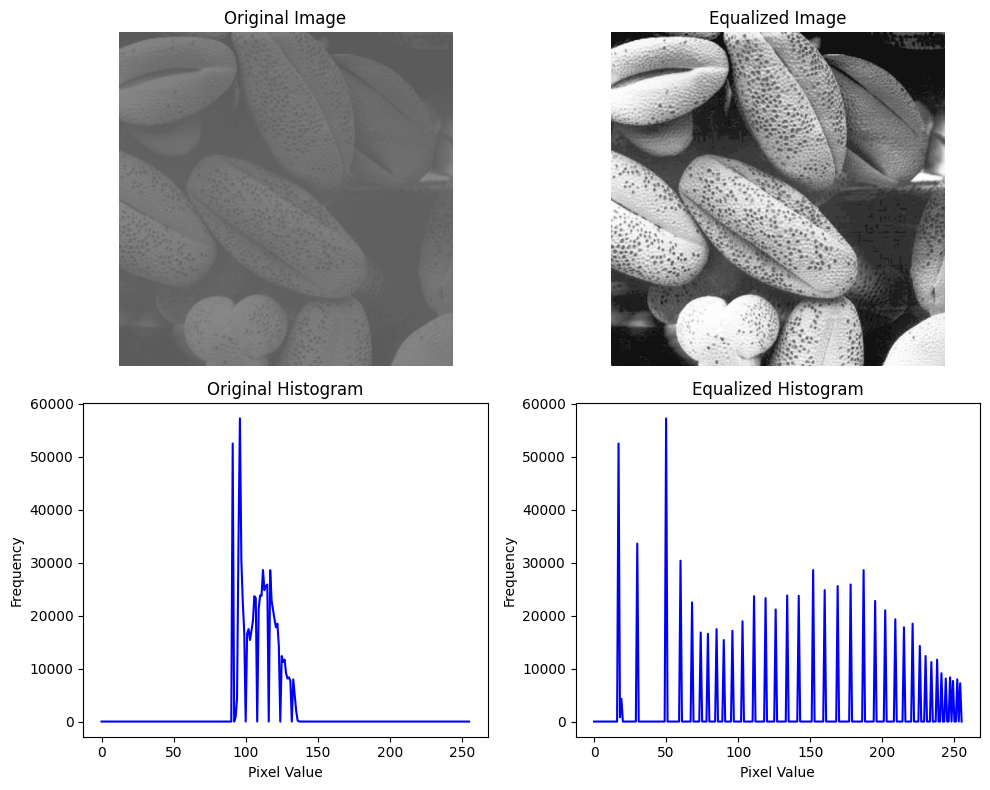

In [ ]:
hist, _ = np.histogram(img.flatten(), 256, [0, 256])
cdf = hist.cumsum()
cdf_normalized = cdf / float(cdf.max())
equalized_img = np.interp(img.flatten(), range(256), cdf_normalized * 255).reshape(img.shape).astype(np.uint8)
hist_original, _ = np.histogram(img.flatten(), 256, [0, 256])
hist_equalized, _ = np.histogram(equalized_img.flatten(), 256, [0, 256])
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.plot(hist_original, color='b')
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.subplot(2, 2, 4)
plt.plot(hist_equalized, color='b')
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


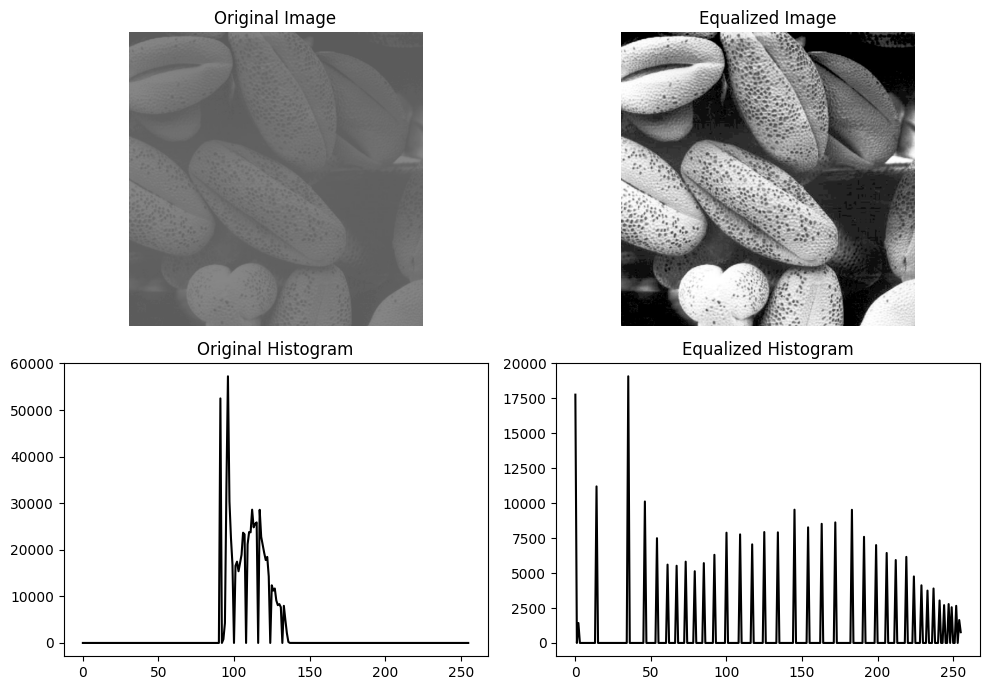

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
equalized_img = cv2.equalizeHist(gray_img)

hist, bins = np.histogram(img.flatten(), 256, [0,256])
equalized_hist, equalized_bins = np.histogram(equalized_img.flatten(), 256, [0,256])

fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[1, 0].plot(hist, color='black')
axs[1, 0].set_title('Original Histogram')
axs[0, 1].imshow(equalized_img, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

axs[1, 1].plot(equalized_hist, color='black')
axs[1, 1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()